$$\hat\theta = (X^TX)^{-1}X^Ty$$

In [2]:
#(2,100)(100,2)=> (2,2)(2,100) => (2,100)(100,1) => (2,1)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
m = 100
X = 2 * np.random.rand(m, 1)
y = 3 + 4*X + 1.5*np.random.randn(m, 1)

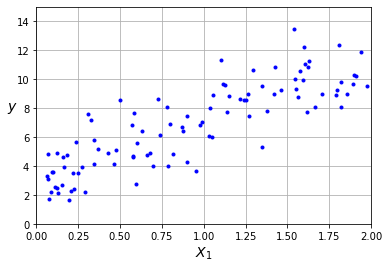

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

In [7]:
X_b = np.c_[np.ones((m,1)), X]
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta

array([[3.09528757],
       [4.11121333]])

In [8]:
X_new = [[0], [0.75], [1.5], [2]]
X_new_b = np.c_[np.ones((4,1)), X_new]
y_predict = X_new_b @ theta
y_predict

array([[ 3.09528757],
       [ 6.17869757],
       [ 9.26210757],
       [11.31771423]])

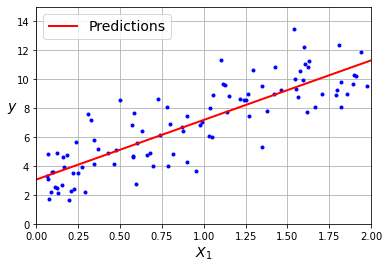

In [9]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

# Using sklearn library

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
model.intercept_, model.coef_

(array([3.09528757]), array([[4.11121333]]))

In [13]:
model.predict(X_new)

array([[ 3.09528757],
       [ 6.17869757],
       [ 9.26210757],
       [11.31771423]])

# Gradient Descent

In [86]:
eta = 0.001
epochs = 1000

In [87]:
theta = np.random.randn(2,1)
theta

array([[ 0.41218119],
       [-0.57178456]])

In [88]:
J_log = np.zeros(epochs)

for i in range(epochs):
    J_log[i] = (2/m) * ((X_b@theta - y)**2).sum()
    gradients = (1/m) * (X_b.T @ (X_b@theta - y))
    theta = theta - eta*gradients

In [89]:
theta

array([[3.33765874],
       [2.94788334]])

In [90]:
# (array([3.09528757]), array([[4.11121333]]))

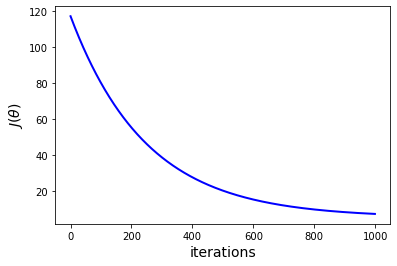

In [91]:
plt.plot(np.arange(epochs), J_log, "b-", linewidth=2)
plt.xlabel("iterations", fontsize=14)
plt.ylabel(r"$J(\theta)$", fontsize=14)
plt.show()